# Wavelet Decomposition and Reconstruction of an Image

In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

In [7]:
import numpy as np
import jax.numpy as jnp

In [4]:
import cr.sparse.wt as wt
import skimage.data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
image = skimage.data.camera()
image_jax = jnp.array(image).block_until_ready()

In [12]:
coeffs2 = wt.dwt2(image, 'bior1.3')

In [13]:
LL, (LH, HL, HH) = coeffs2

In [14]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

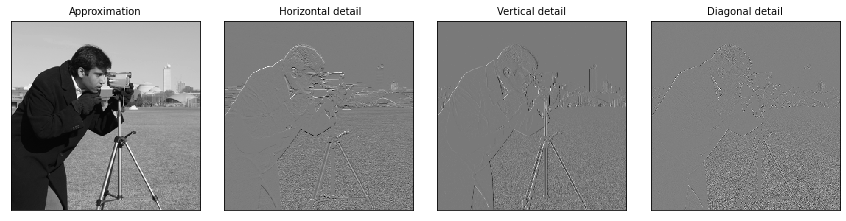

In [15]:
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [17]:
reconstruction = wt.idwt2(coeffs2, 'bior1.3')

In [18]:
jnp.allclose(reconstruction, image)

DeviceArray(True, dtype=bool)